In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
from ML_Stats.distro_graphs import *

import os
sns.set(style='white', context='notebook', palette='deep')
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
folder = '../data/raw/Training/'
train = pd.DataFrame()
files = [file for file in os.listdir(folder) if file[0] != '.']
for file in files:
    df = pd.read_csv(folder+'/'+file, header=None)
    train = pd.concat([train, df], sort=False)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,0
3,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
attributes = {
    
    0 : 'page_likes',
    1 : 'visits',
    2 : 'page_engagement',
    3 : 'page_type',
    4 : 'drv1',
    5 : 'drv2',
    6 : 'drv3',
    7 : 'drv4',
    8 : 'drv5',
    9 : 'drv6',
    10 : 'drv7',
    11 : 'drv8',
    12 : 'drv9',
    13 : 'drv10',
    14 : 'drv11',
    15 : 'drv12',
    16 : 'drv13',
    17 : 'drv14',
    18 : 'drv15',
    19 : 'drv16',
    20 : 'drv17',
    21 : 'drv18',
    22 : 'drv19',
    23 : 'drv20',
    24 : 'drv21',
    25 : 'drv22',
    26 : 'drv23',
    27 : 'drv24',
    28 : 'drv25',
    29 : 'cc1', #The total number of comments before selected base date/time
    30 : 'cc2', #The number of comments in last 24 hours, relative to base date/time
    31 : 'cc3', #The number of comments in last 48 to last 24 hours relative to base date/time
    32 : 'cc4', #The number of comments in the first 24 hours after the publication of post but before base date/time
    33 : 'cc5', #Difference between cc2 and cc3
    34 : 'time_frame',
    35 : 'post_length',
    36 : 'num_shares',
    37 : 'promotion',
    38 : 'hour_local',
    39 : 'sunday',
    40 : 'monday',
    41 : 'tuesday',
    42 : 'wednesday',
    43 : 'thursday',
    44 : 'friday',
    45 : 'saturday',
    46 : 'dt_sun',
    47 : 'dt_mon',
    48 : 'dt_tue',
    49 : 'dt_wed',
    50 : 'dt_thu',
    51 : 'dt_fri',
    52 : 'dt_sat',
    53 : 'target'
            
             }

In [5]:
train.rename(columns=attributes, inplace=True)

In [6]:
fp = '../data/raw/Category_File.txt'
page_categories = dict()
with open (fp) as f:
    for i, line in enumerate(f.readlines(), start=1):
        page_categories[i] = line.strip('\n')
page_categories

{1: 'Product/service',
 2: 'Public figure',
 3: 'Retail and consumer merchandise ',
 4: 'Athlete',
 5: 'Education website ',
 6: 'Arts/entertainment/nightlife ',
 7: 'Aerospace/defense',
 8: 'Actor/director',
 9: 'Professional sports team ',
 10: 'Travel/leisure',
 11: 'Arts/humanities website ',
 12: 'Food/beverages',
 13: 'Record label',
 14: 'Movie',
 15: 'Song',
 16: 'Community',
 17: 'Company',
 18: 'Artist',
 19: 'Non-governmental organization (ngo) ',
 20: 'Media/news/publishing',
 21: 'Cars',
 22: 'Clothing',
 23: 'Local business',
 24: 'Musician/band',
 25: 'Politician',
 26: 'News/media website',
 27: 'Education',
 28: 'Author',
 29: 'Sports event',
 30: 'Restaurant/cafe',
 31: 'School sports team',
 32: 'University',
 33: 'Tv show',
 34: 'Website',
 35: 'Outdoor gear/sporting goods ',
 36: 'Political party',
 37: 'Sports league',
 38: 'Entertainer',
 39: 'Church/religious organization ',
 40: 'Non-profit organization',
 41: 'Automobiles and parts',
 42: 'Tv channel',
 43: 'T

In [7]:
actual_cats = train.page_type.apply(lambda x: page_categories[x])
train['page_type'] = actual_cats

In [8]:
train['page_type'].value_counts()

Professional sports team     110313
Musician/band                 66473
Artist                        63314
Political party               35163
Community                     27805
                              ...  
Health/medical/pharmacy         232
Studio                           58
Sports venue                     29
Cause                            15
Computers                        15
Name: page_type, Length: 81, dtype: int64

In [9]:
train.shape

(602813, 54)

In [10]:
train.head()

,page_likes,visits,page_engagement,page_type,drv1,drv2,drv3,drv4,drv5,drv6,...,friday,saturday,dt_sun,dt_mon,dt_tue,dt_wed,dt_thu,dt_fri,dt_sat,target
0,634995,0,463,Product/service,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,Product/service,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,Product/service,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,0
3,634995,0,463,Product/service,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,Product/service,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,1,0,0,0



 mu = 7.16 and sigma = 34.46



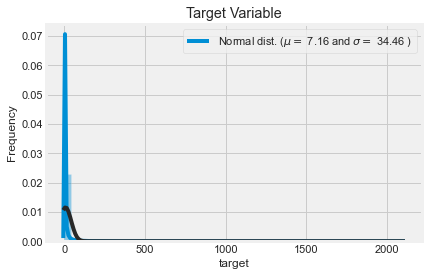

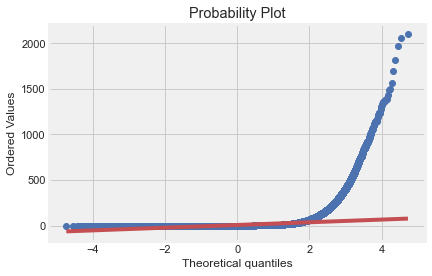

Skewness: 15.542366
Kurtosis: 399.922069


In [11]:
plot_target_distribution(train['target'])

In [12]:
np.quantile(train['target'].describe()

count    602813.000000
mean          7.163027
std          34.462254
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        2106.000000
Name: target, dtype: float64

In [19]:
(train['target'] <= np.quantile(train['target'], .95)).sum()

573131


 mu = 1.29 and sigma = 2.42



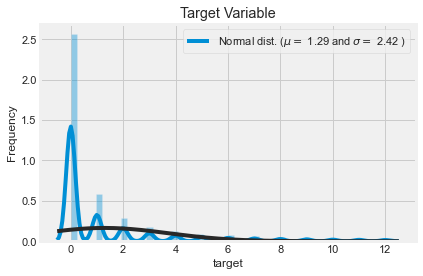

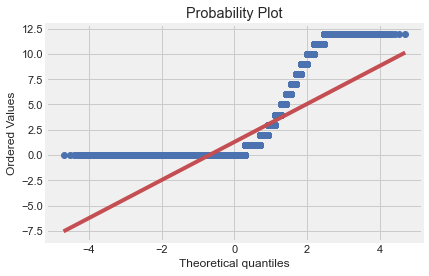

Skewness: 2.405439
Kurtosis: 5.582303


In [12]:
# Plot Histogram
plot_target_distribution(train['target'][train['target'] <= np.quantile(train['target'], .90)])

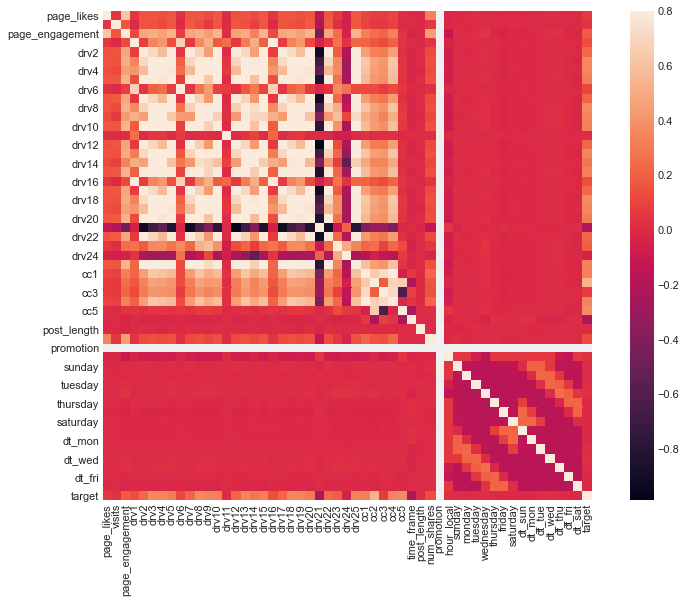

In [13]:
# Correlation Matrix Heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

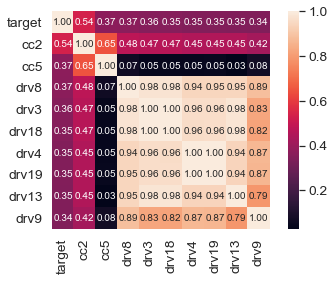

In [14]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,target
1,cc2
2,cc5
3,drv8
4,drv3
5,drv18
6,drv4
7,drv19
8,drv13
9,drv9


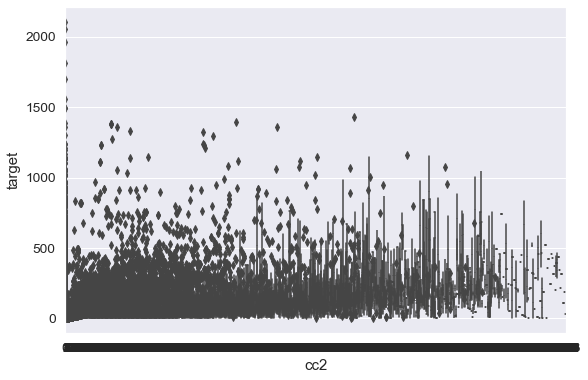

In [18]:
# Overall Quality vs Sale Price
var = 'cc2'
data = pd.concat([train['target'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis();